In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count - must be at least 500 cities
len(cities)

623

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print(f"City not found:{city}. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | poum
Processing Record 2 of Set 1 | utiroa
City not found:utiroa. Skipping...
Processing Record 3 of Set 1 | opuwo
Processing Record 4 of Set 1 | konskie
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | batouri
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | tucuman
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | alexandria
Processing Record 17 of Set 1 | vestmannaeyjar
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | port blair
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | soyo
Processing Record 22 of Set 1 | saint-philippe
Processing Record 23 of Set 1 | tabuk
Processing Record 24 of Se

Processing Record 42 of Set 4 | miramar
Processing Record 43 of Set 4 | grand river south east
City not found:grand river south east. Skipping...
Processing Record 44 of Set 4 | isangel
Processing Record 45 of Set 4 | mount gambier
Processing Record 46 of Set 4 | kuche
City not found:kuche. Skipping...
Processing Record 47 of Set 4 | luderitz
Processing Record 48 of Set 4 | lagoa
Processing Record 49 of Set 4 | at-bashi
Processing Record 50 of Set 4 | fortuna
Processing Record 1 of Set 5 | zandvoort
Processing Record 2 of Set 5 | grants
Processing Record 3 of Set 5 | anadyr
Processing Record 4 of Set 5 | sokoto
Processing Record 5 of Set 5 | paidha
Processing Record 6 of Set 5 | altay
Processing Record 7 of Set 5 | avera
Processing Record 8 of Set 5 | hofn
Processing Record 9 of Set 5 | marzuq
Processing Record 10 of Set 5 | kazalinsk
City not found:kazalinsk. Skipping...
Processing Record 11 of Set 5 | saint-joseph
Processing Record 12 of Set 5 | doka
Processing Record 13 of Set 5 | g

Processing Record 26 of Set 8 | kautokeino
Processing Record 27 of Set 8 | bathsheba
Processing Record 28 of Set 8 | faya
Processing Record 29 of Set 8 | marystown
Processing Record 30 of Set 8 | salina
Processing Record 31 of Set 8 | fare
Processing Record 32 of Set 8 | tokur
Processing Record 33 of Set 8 | igarka
Processing Record 34 of Set 8 | denpasar
Processing Record 35 of Set 8 | attawapiskat
City not found:attawapiskat. Skipping...
Processing Record 36 of Set 8 | nardaran
Processing Record 37 of Set 8 | mackay
Processing Record 38 of Set 8 | portland
Processing Record 39 of Set 8 | basco
Processing Record 40 of Set 8 | jishou
Processing Record 41 of Set 8 | labuan
Processing Record 42 of Set 8 | formosa
Processing Record 43 of Set 8 | uyuni
Processing Record 44 of Set 8 | louisbourg
City not found:louisbourg. Skipping...
Processing Record 45 of Set 8 | xinzhou
Processing Record 46 of Set 8 | goryachegorsk
Processing Record 47 of Set 8 | hovd
Processing Record 48 of Set 8 | mead

City not found:sorvag. Skipping...
Processing Record 16 of Set 12 | mys shmidta
City not found:mys shmidta. Skipping...
Processing Record 17 of Set 12 | simbahan
Processing Record 18 of Set 12 | karpogory
Processing Record 19 of Set 12 | bom jardim
Processing Record 20 of Set 12 | nong kung si
Processing Record 21 of Set 12 | luanda
Processing Record 22 of Set 12 | samusu
City not found:samusu. Skipping...
Processing Record 23 of Set 12 | marcona
City not found:marcona. Skipping...
Processing Record 24 of Set 12 | arauca
Processing Record 25 of Set 12 | marsabit
Processing Record 26 of Set 12 | barcelos
Processing Record 27 of Set 12 | vaitupu
City not found:vaitupu. Skipping...
Processing Record 28 of Set 12 | tomatlan
Processing Record 29 of Set 12 | nioro
Processing Record 30 of Set 12 | eyl
Processing Record 31 of Set 12 | egvekinot
Processing Record 32 of Set 12 | whitianga
Processing Record 33 of Set 12 | alegrete
Processing Record 34 of Set 12 | boa vista
Processing Record 35 of

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Poum,-20.2333,164.0167,78.78,76,0,9.22,NC,2022-05-03 02:20:37
1,Opuwo,-18.0607,13.8400,66.24,37,6,7.25,NA,2022-05-03 02:24:43
2,Konskie,51.1917,20.4061,48.24,79,88,2.75,PL,2022-05-03 02:24:44
3,Pevek,69.7008,170.3133,26.89,92,100,2.77,RU,2022-05-03 02:21:58
4,Punta Arenas,-53.1500,-70.9167,42.12,75,100,15.37,CL,2022-05-03 02:20:17
5,Kapaa,22.0752,-159.3190,80.58,88,40,17.27,US,2022-05-03 02:24:45
6,Batouri,4.4333,14.3667,68.49,97,100,1.77,CM,2022-05-03 02:24:45
7,Dikson,73.5069,80.5464,8.74,94,99,13.24,RU,2022-05-03 02:24:46
8,Kaitangata,-46.2817,169.8464,63.14,54,2,1.92,NZ,2022-05-03 02:24:46
9,Tucuman,-26.8241,-65.2226,55.40,88,75,2.30,AR,2022-05-03 02:24:47


In [12]:
#Next, we'll reorder the columns as 
#City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, 
#so they are easy to read.

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Poum,NC,2022-05-03 02:20:37,-20.2333,164.0167,78.78,76,0,9.22
1,Opuwo,NA,2022-05-03 02:24:43,-18.0607,13.8400,66.24,37,6,7.25
2,Konskie,PL,2022-05-03 02:24:44,51.1917,20.4061,48.24,79,88,2.75
3,Pevek,RU,2022-05-03 02:21:58,69.7008,170.3133,26.89,92,100,2.77
4,Punta Arenas,CL,2022-05-03 02:20:17,-53.1500,-70.9167,42.12,75,100,15.37


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

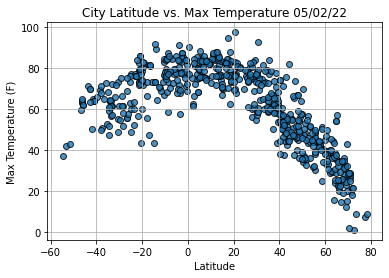

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

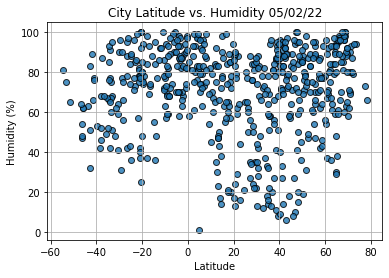

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

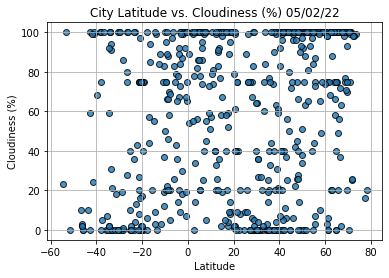

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

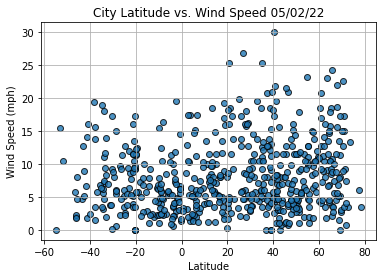

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()